# Árvore Binária de Busca

Neste arquivo você encontra a Implementação de uma Árvore Binária de Busca (_BST - Binary Search Tree_) contendo os seguintes métodos:

- inserir
- removerNo
- percursoEmOrdem
- percursoPreOrdem
- percursoPosOrdem
- buscar


In [11]:
class Node:
    def __init__(self, chave):
        self.esquerda = None
        self.direita = None
        self.valor = chave

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

class ArvoreBinariaBusca:
    def __init__(self):
        self.raiz = None

    def inserir(self, chave):
        self.raiz = self._inserir(self.raiz, chave)

    def remover(self, chave):
        self.raiz = self._remover(self.raiz, chave)

    def percurso_em_ordem(self):
        self._percurso_em_ordem(self.raiz)
        print(" ")

    def percurso_pre_ordem(self):
        self._percurso_pre_ordem(self.raiz)
        print(" ")
    
    def percurso_pos_ordem(self):
        self._percurso_pos_ordem(self.raiz)
        print(" ")

    def buscar(self, chave):
        return self._buscar(self.raiz, chave, 0)

    def _inserir(self, raiz, chave):
        if raiz is None:
            return Node(chave)
        else:
            if raiz.valor < chave:
                raiz.direita = self._inserir(raiz.direita, chave)
            else:
                raiz.esquerda = self._inserir(raiz.esquerda, chave)
        return raiz
    
    def _remover(self, raiz, chave):
        if raiz is None:
            return raiz
        
        # Localização do elemento a ser excluído 
        if chave < raiz.valor:
            raiz.esquerda = self._remover(raiz.esquerda, chave)
        elif chave > raiz.valor:
            raiz.direita = self._remover(raiz.direita, chave)
        else: 
            if raiz.esquerda is None:
                return raiz.direita
            if raiz.direita is None:
                return raiz.esquerda
            temp = self.node_valor_minimo(raiz.direita)
            raiz.valor = temp.valor
            raiz.direita = self._remover(raiz.direita, temp.valor)
        return raiz

    def node_valor_minimo(self, nodo):
        atual = nodo
        while atual.esquerda is not None:
            atual = atual.esquerda 
        return atual


    def _percurso_em_ordem(self, raiz):
        if raiz:
            self._percurso_em_ordem(raiz.esquerda)
            print(raiz.valor, end=' ')
            self._percurso_em_ordem(raiz.direita)
    
    def _percurso_pre_ordem(self, raiz):
        if raiz:
            print(raiz.valor, end=' ')
            self._percurso_em_ordem(raiz.esquerda)
            self._percurso_em_ordem(raiz.direita)

    def _percurso_pos_ordem(self, raiz):
        if raiz:
            self._percurso_em_ordem(raiz.esquerda)
            self._percurso_em_ordem(raiz.direita)
            print(raiz.valor, end=' ')

    def _buscar(self, raiz, chave, passos):
        if raiz is None:
            return (False, passos)
        
        if raiz.valor == chave:
            return (True, passos + 1)
        elif raiz.valor < chave:
            return self._buscar(raiz.direita, chave, passos + 1)
        else: 
            return self._buscar(raiz.esquerda, chave, passos + 1)

    def exibir_arvore(self):
        if not self.raiz:
            print("Árvore está vazia")
            return
        G = nx.DiGraph()
        posicoes = {}

        def adicionar_nos_arestas(node, posicao=0, nivel=0, largura=1.0):
            if node is not None:
                posicoes[node.valor] = (posicao, -nivel)
                if node.esquerda:
                    G.add_edge(node.valor, node.esquerda.valor)
                    adicionar_nos_arestas(node.esquerda, posicao - largura / 2 ** (nivel + 1), nivel + 1, largura)
                if node.direita:
                    G.add_edge(node.valor, node.direita.valor)
                    adicionar_nos_arestas(node.direita, posicao + largura / 2 ** (nivel + 1), nivel + 1, largura)
                
                if node.esquerda is None and node.direita is None:
                    G.add_node(node.valor)

        adicionar_nos_arestas(self.raiz)
        nx.draw(G, posicoes, 
                with_labels=True, 
                arrows=False, 
                node_size=3000, 
                node_color="skyblue", 
                font_size=15, 
                font_weight="bold")
        plt.show()


Percurso em ordem
1 5 8 11 14 17 21  


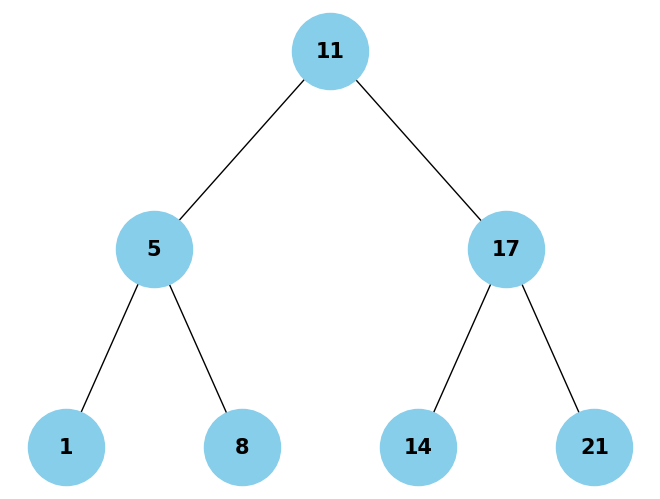

Percurso em ordem
1 5 8 11 14 17 21  


In [39]:
abb = ArvoreBinariaBusca()

abb.inserir(11)
abb.inserir(5)
abb.inserir(17)
abb.inserir(1)
abb.inserir(8)
abb.inserir(14)
abb.inserir(21)

# print(abb.buscar(21))

# print("Percurso pré-ordem")
# abb.percurso_pre_ordem()

print("Percurso em ordem")
abb.percurso_em_ordem()

abb.exibir_arvore()

# print("Percurso pós-ordem")
# abb.percurso_pos_ordem()

# abb.remover(14)
# abb.remover(17)
# abb.remover(5)

print("Percurso em ordem")
abb.percurso_em_ordem()


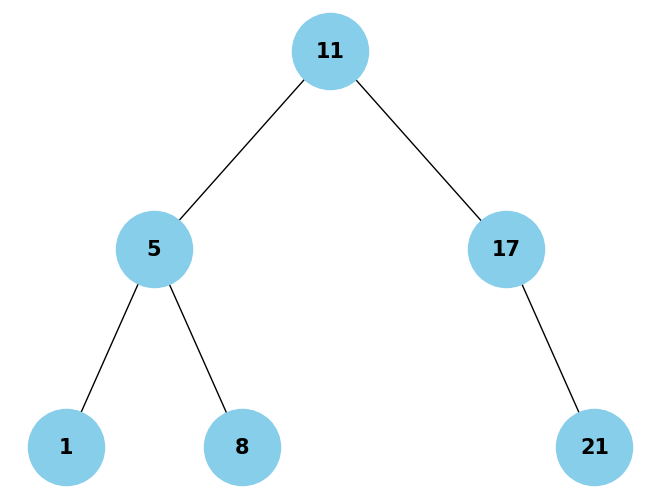

Percurso em ordem
1 5 8 11 17 21  


In [40]:
abb.remover(14)
abb.exibir_arvore()

print("Percurso em ordem")
abb.percurso_em_ordem()

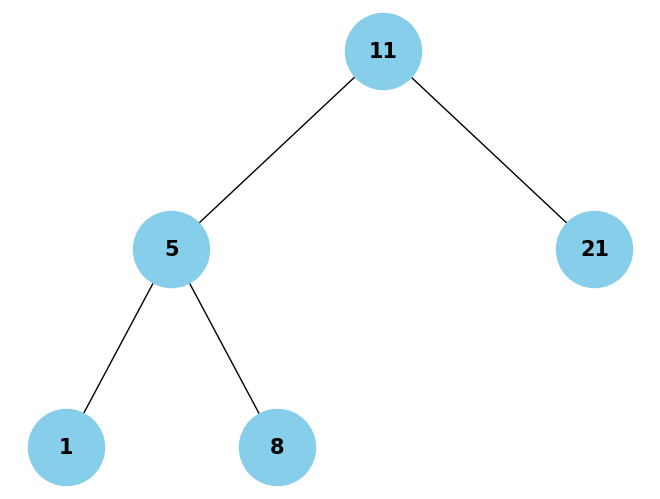

In [41]:

abb.remover(17)
abb.exibir_arvore()


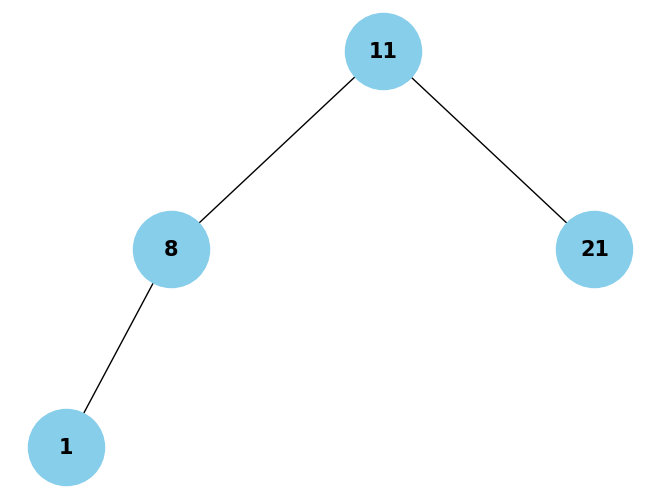

In [42]:
abb.remover(5)
abb.exibir_arvore()